In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("data/Merged_Train_Data.csv")

In [3]:
df.head()

,Unnamed: 0,year,month,day,hour,O3_forecast,NO2_forecast,T_forecast,q_forecast,u_forecast,v_forecast,w_forecast,NO2_satellite,HCHO_satellite,ratio_satellite,O3_target,NO2_target,location
0,0,2022.0,7.0,28.0,0.0,73.35,57.54,22.99,7.68,-3.46,1.28,1.02,NaN,NaN,NaN,5.03,6.75,Satyawati College
1,1,2022.0,7.0,28.0,1.0,82.77,57.25,23.90,7.70,-1.35,0.29,0.99,NaN,NaN,NaN,5.08,6.07,Satyawati College
2,2,2022.0,7.0,28.0,2.0,92.19,56.97,23.89,7.72,0.76,-0.70,0.96,NaN,NaN,NaN,6.95,3.38,Satyawati College
3,3,2022.0,7.0,28.0,3.0,101.62,56.68,23.92,7.74,2.87,-1.69,0.93,NaN,NaN,NaN,5.80,4.85,Satyawati College
4,4,2022.0,7.0,28.0,4.0,113.51,64.06,25.55,7.81,2.45,-1.15,0.66,NaN,NaN,NaN,7.22,7.72,Satyawati College


In [4]:
df.shape

(198032, 18)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198032 entries, 0 to 198031
Data columns (total 18 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Unnamed: 0       198032 non-null  int64  
 1   year             198032 non-null  float64
 2   month            198032 non-null  float64
 3   day              198032 non-null  float64
 4   hour             198032 non-null  float64
 5   O3_forecast      198032 non-null  float64
 6   NO2_forecast     198032 non-null  float64
 7   T_forecast       198032 non-null  float64
 8   q_forecast       198032 non-null  float64
 9   u_forecast       198032 non-null  float64
 10  v_forecast       198032 non-null  float64
 11  w_forecast       198032 non-null  float64
 12  NO2_satellite    6483 non-null    float64
 13  HCHO_satellite   7100 non-null    float64
 14  ratio_satellite  6160 non-null    float64
 15  O3_target        198032 non-null  float64
 16  NO2_target       198032 non-null  floa

In [6]:
df.describe()

,Unnamed: 0,year,month,day,hour,O3_forecast,NO2_forecast,T_forecast,q_forecast,u_forecast,v_forecast,w_forecast,NO2_satellite,HCHO_satellite,ratio_satellite,O3_target,NO2_target
count,198032.000000,198032.000000,198032.000000,198032.000000,198032.000000,198032.000000,198032.000000,198032.000000,198032.000000,198032.000000,198032.000000,198032.000000,6483.000000,7100.000000,6160.000000,198032.000000,198032.000000
mean,12424.081946,2021.501737,6.604751,15.735275,11.499535,69.985696,55.063996,23.975504,12.019128,0.378662,-0.494754,0.327117,0.773997,1.596615,0.813869,29.247142,35.789713
std,7225.267427,1.492280,3.478778,8.908366,6.922450,61.791164,42.692535,8.302124,5.449357,2.064265,1.319005,1.933416,0.622291,0.864603,2.122704,33.077147,28.406144
min,0.000000,2019.000000,1.000000,1.000000,0.000000,0.000000,1.410000,1.950000,2.550000,-8.540000,-7.500000,-9.820000,0.020000,0.000000,0.040000,0.100000,0.100000
25%,6188.000000,2020.000000,4.000000,8.000000,5.000000,20.310000,19.690000,17.530000,7.460000,-1.130000,-1.480000,-1.040000,0.430000,0.990000,0.280000,5.600000,15.270000
50%,12376.500000,2022.000000,7.000000,16.000000,11.000000,48.820000,45.980000,25.670000,10.020000,0.650000,-0.620000,0.360000,0.590000,1.500000,0.420000,15.450000,27.650000
75%,18565.000000,2023.000000,10.000000,23.000000,17.000000,116.080000,80.780000,30.070000,17.320000,1.830000,0.470000,1.650000,0.870000,2.072500,0.720000,41.800000,47.930000
max,26352.000000,2024.000000,12.000000,31.000000,23.000000,524.310000,424.830000,45.710000,24.570000,8.560000,5.490000,9.170000,6.890000,8.180000,43.860000,199.900000,293.100000


In [7]:
df = df.drop(columns=["NO2_satellite","HCHO_satellite","ratio_satellite"])
df.head()

,Unnamed: 0,year,month,day,hour,O3_forecast,NO2_forecast,T_forecast,q_forecast,u_forecast,v_forecast,w_forecast,O3_target,NO2_target,location
0,0,2022.0,7.0,28.0,0.0,73.35,57.54,22.99,7.68,-3.46,1.28,1.02,5.03,6.75,Satyawati College
1,1,2022.0,7.0,28.0,1.0,82.77,57.25,23.90,7.70,-1.35,0.29,0.99,5.08,6.07,Satyawati College
2,2,2022.0,7.0,28.0,2.0,92.19,56.97,23.89,7.72,0.76,-0.70,0.96,6.95,3.38,Satyawati College
3,3,2022.0,7.0,28.0,3.0,101.62,56.68,23.92,7.74,2.87,-1.69,0.93,5.80,4.85,Satyawati College
4,4,2022.0,7.0,28.0,4.0,113.51,64.06,25.55,7.81,2.45,-1.15,0.66,7.22,7.72,Satyawati College


In [8]:
for col in df.columns:
    print(col, "Min:", df[col].min(), "Max:", df[col].max())

Unnamed: 0 Min: 0 Max: 26352
year Min: 2019.0 Max: 2024.0
month Min: 1.0 Max: 12.0
day Min: 1.0 Max: 31.0
hour Min: 0.0 Max: 23.0
O3_forecast Min: 0.0 Max: 524.31
NO2_forecast Min: 1.41 Max: 424.83
T_forecast Min: 1.95 Max: 45.71
q_forecast Min: 2.55 Max: 24.57
u_forecast Min: -8.54 Max: 8.56
v_forecast Min: -7.5 Max: 5.49
w_forecast Min: -9.82 Max: 9.17
O3_target Min: 0.1 Max: 199.9
NO2_target Min: 0.1 Max: 293.1
location Min: Bawana Industrial Area Max: Sonia Vihar


In [9]:
df.rename(columns={
    "T_forecast": "Temperature_forecast",
    "q_forecast": "Specific_humidity_forecast",
    "u_forecast": "U_wind_forecast",
    "v_forecast": "V_wind_forecast",
    "w_forecast": "Vertical_wind_forecast"
},inplace=True)

print(df.columns)

Index(['Unnamed: 0', 'year', 'month', 'day', 'hour', 'O3_forecast',
       'NO2_forecast', 'Temperature_forecast', 'Specific_humidity_forecast',
       'U_wind_forecast', 'V_wind_forecast', 'Vertical_wind_forecast',
       'O3_target', 'NO2_target', 'location'],
      dtype='object')


In [10]:
df["date"] = pd.to_datetime(df[["year","month","day"]])
df["datetime"] = pd.to_datetime(df[["year","month","day","hour"]])
df["Wind_speed_forecast"] = np.sqrt(df["U_wind_forecast"]**2 + df["V_wind_forecast"]**2)

In [11]:
df = df.sort_values(by=["location", "datetime"])
df.set_index(["location", "datetime"], inplace=True)

In [12]:
df.isna().sum()

Unnamed: 0                    0
year                          0
month                         0
day                           0
hour                          0
O3_forecast                   0
NO2_forecast                  0
Temperature_forecast          0
Specific_humidity_forecast    0
U_wind_forecast               0
V_wind_forecast               0
Vertical_wind_forecast        0
O3_target                     0
NO2_target                    0
date                          0
Wind_speed_forecast           0
dtype: int64

In [13]:
forecast_cols = [
    "O3_forecast",
    "NO2_forecast",
    "Temperature_forecast",
    "Specific_humidity_forecast",
    "U_wind_forecast",
    "V_wind_forecast",
    "Vertical_wind_forecast",
    "Wind_speed_forecast"
]
yearly_data = (df.groupby(["location","year"])[forecast_cols].mean().sort_index(level=["location","year"]))
monthly_data = (df.groupby(["location","year","month"])[forecast_cols].mean().sort_index(level=["location","year","month"]))


### Year-wise Analysis

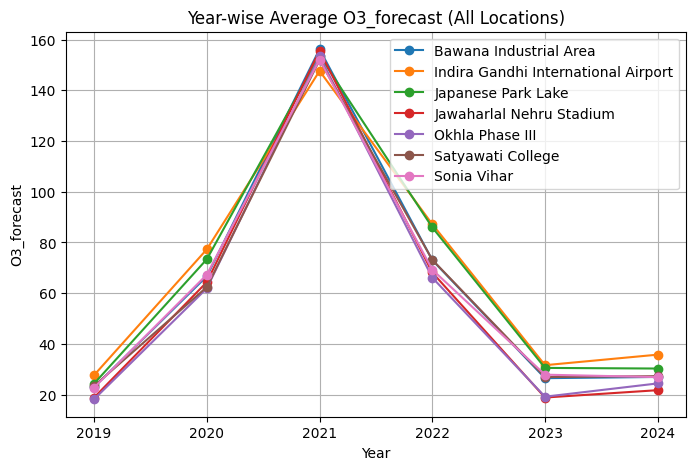

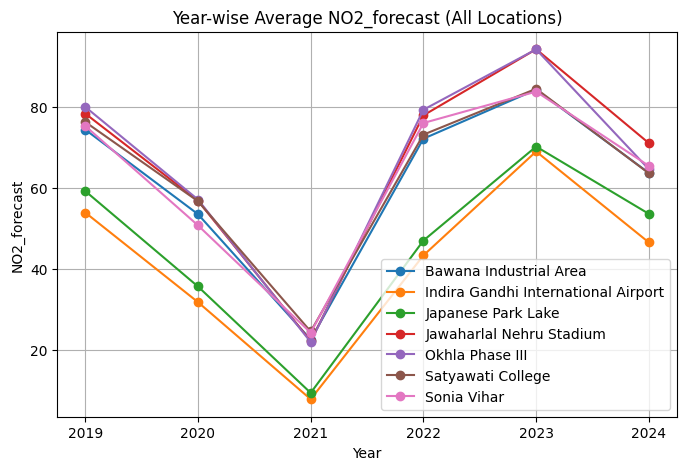

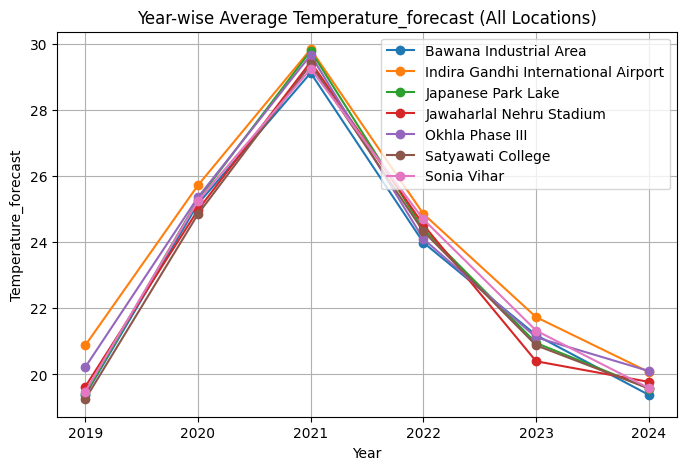

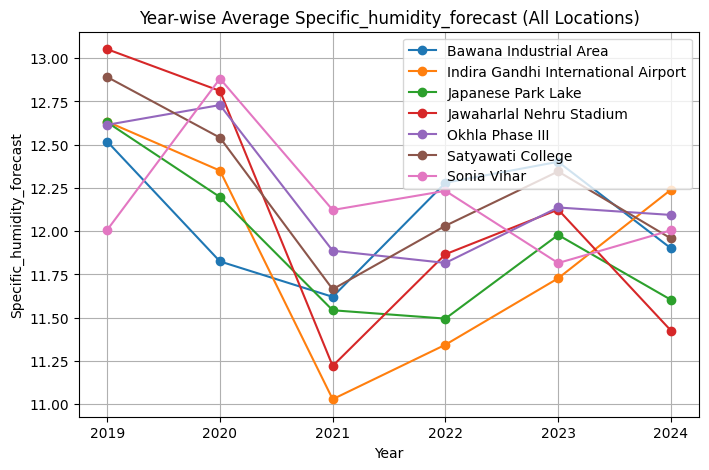

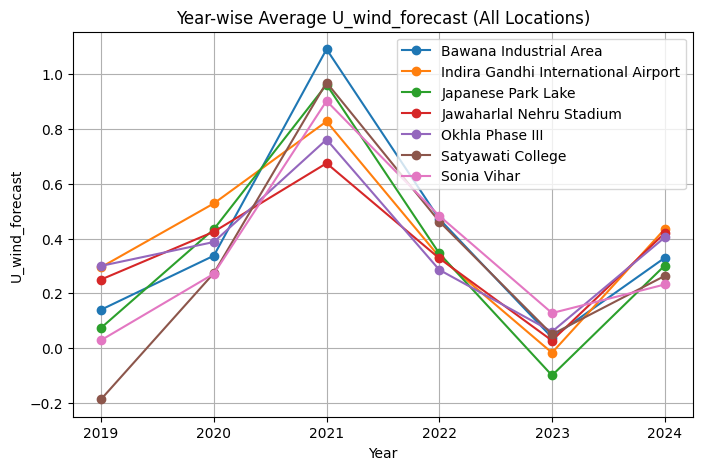

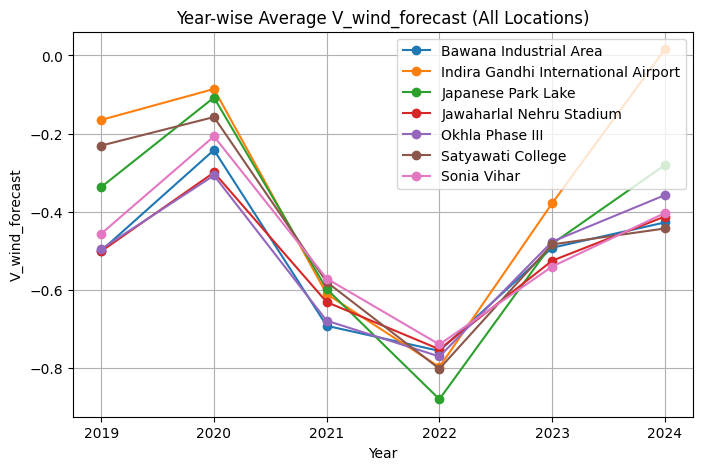

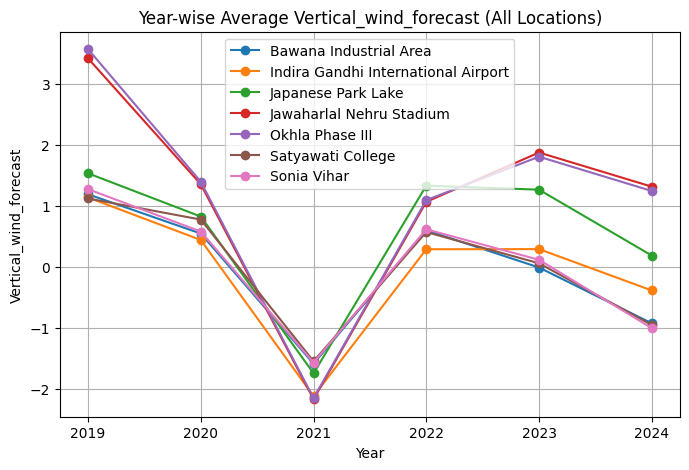

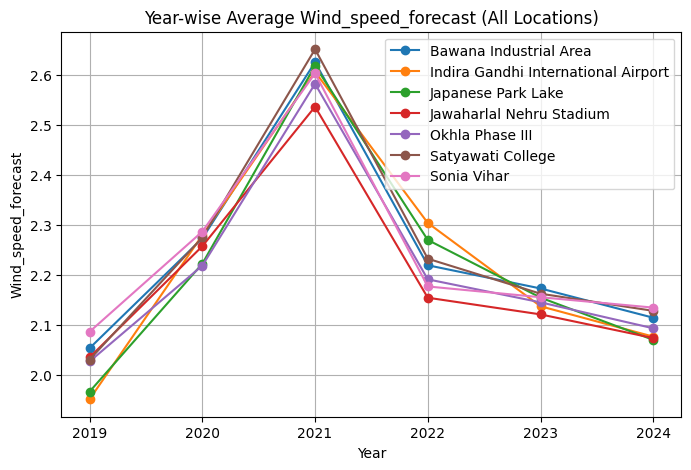

In [14]:
for col in forecast_cols:
    plt.figure(figsize=(8,5))
    
    for loc in yearly_data.index.get_level_values(0).unique():
        loc_data = yearly_data.loc[loc]
        plt.plot(loc_data.index, loc_data[col], marker="o", label=loc)
    
    plt.title(f"Year-wise Average {col} (All Locations)")
    plt.xlabel("Year")
    plt.ylabel(col)
    plt.legend()
    plt.grid(True)
    plt.show()

### Month-wise Analysis

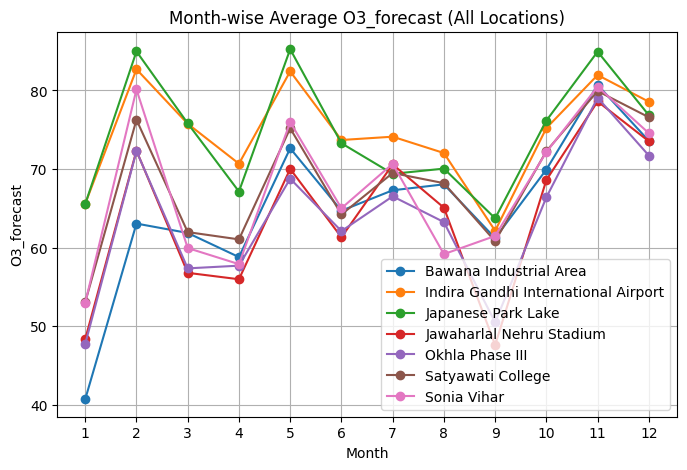

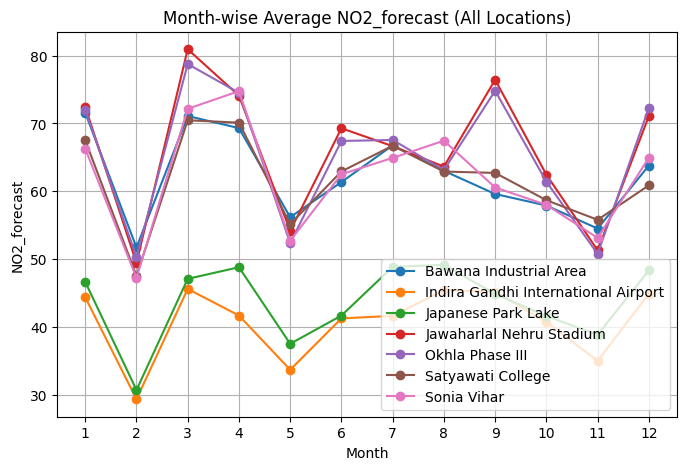

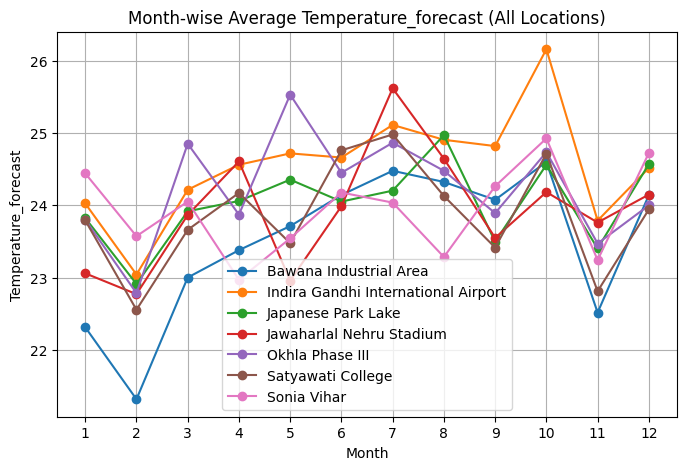

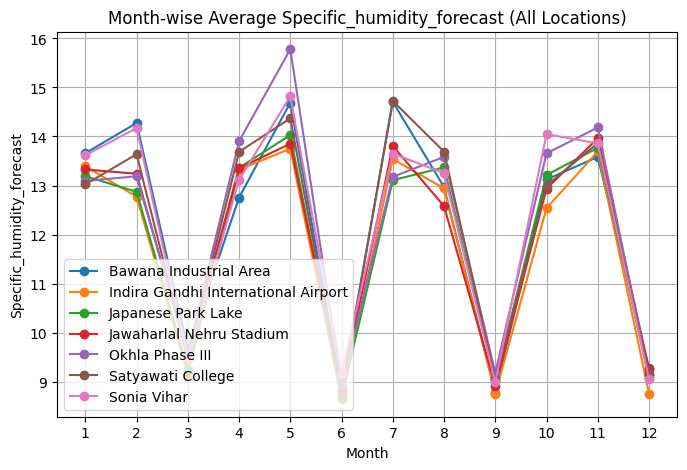

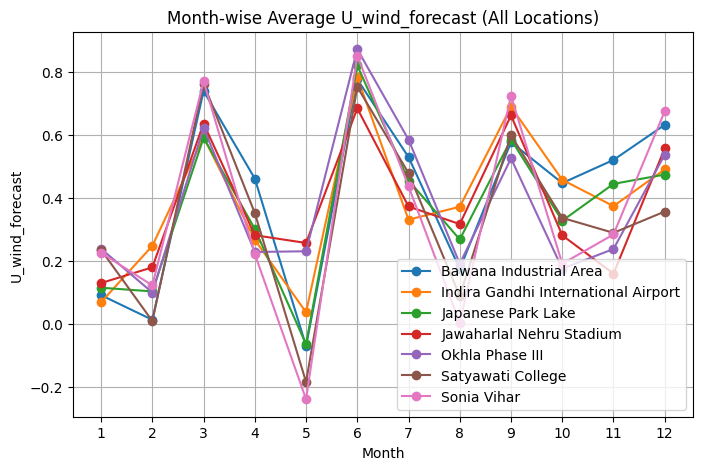

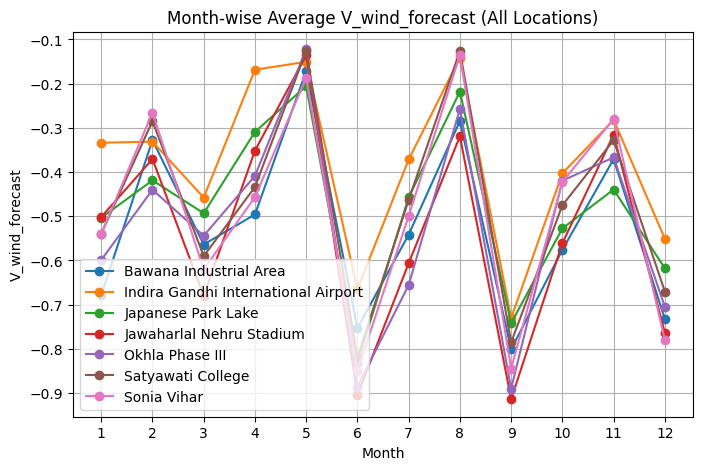

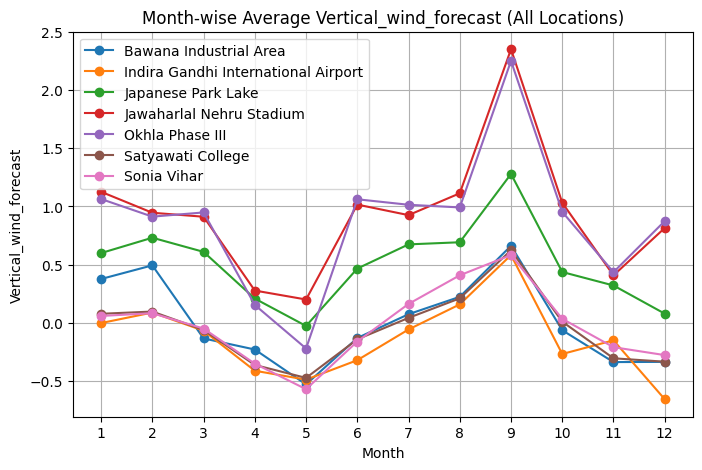

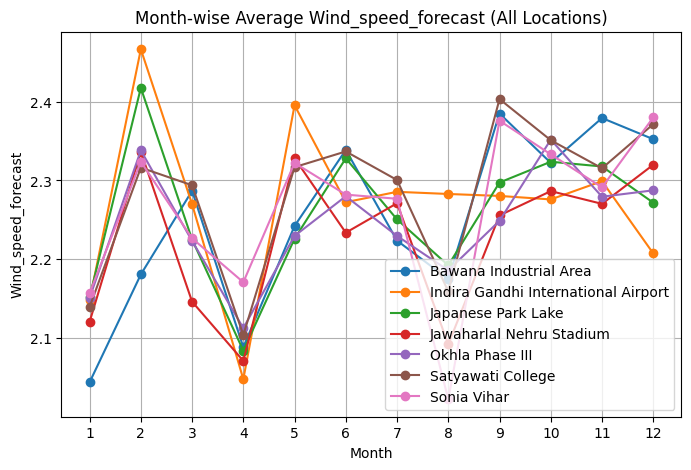

In [15]:
monthly_avg = (monthly_data.groupby(level=["location","month"]).mean())

for col in forecast_cols:
    plt.figure(figsize=(8,5))
    
    for loc in monthly_avg.index.get_level_values(0).unique():
        loc_data = monthly_avg.loc[loc]
        plt.plot(loc_data.index, loc_data[col], marker="o", label=loc)
    
    plt.title(f"Month-wise Average {col} (All Locations)")
    plt.xlabel("Month")
    plt.ylabel(col)
    plt.xticks(range(1,13))
    plt.legend()
    plt.grid(True)
    plt.show()

In [16]:
numeric_cols = df.select_dtypes(include="number").columns

exclude_cols = ["year", "month", "day", "hour"]
numeric_cols = [col for col in numeric_cols if col not in exclude_cols]

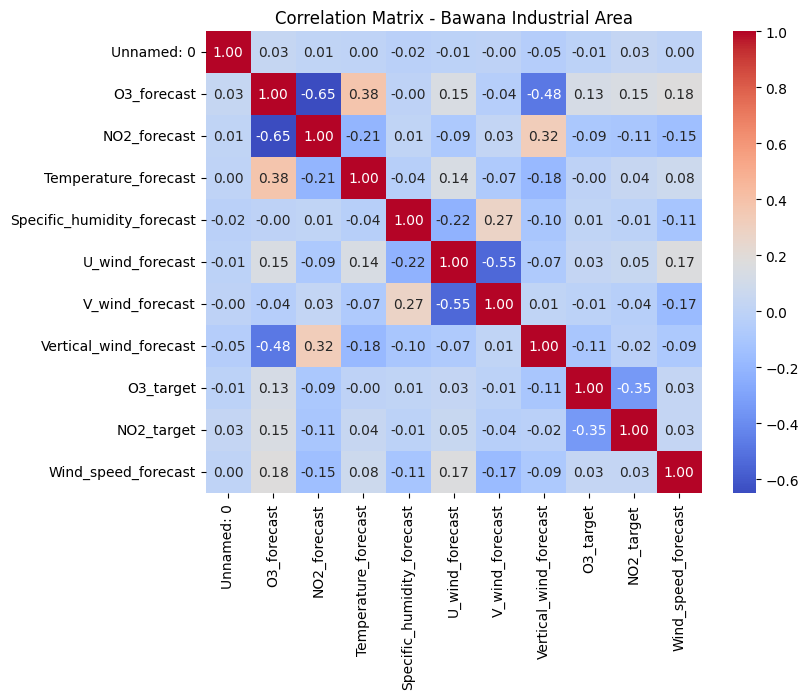

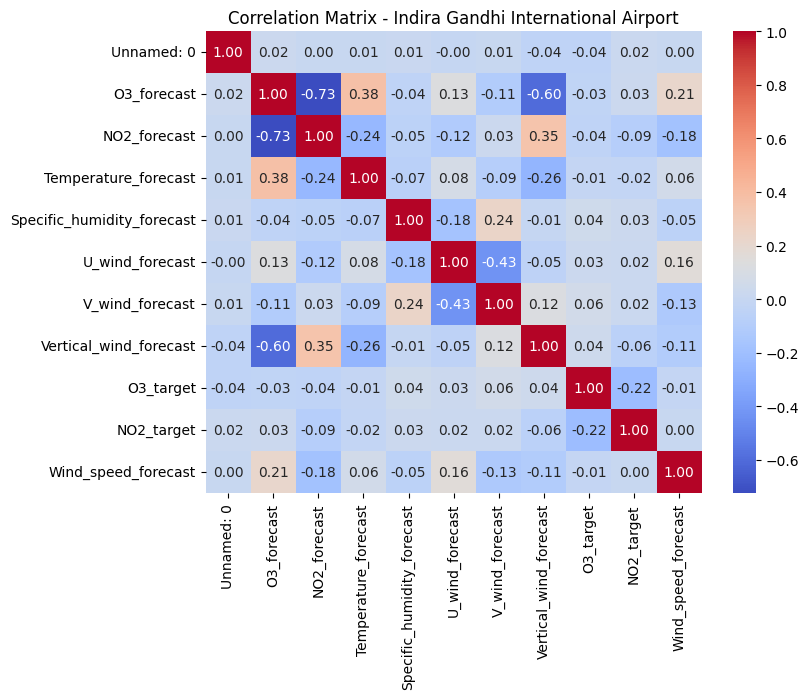

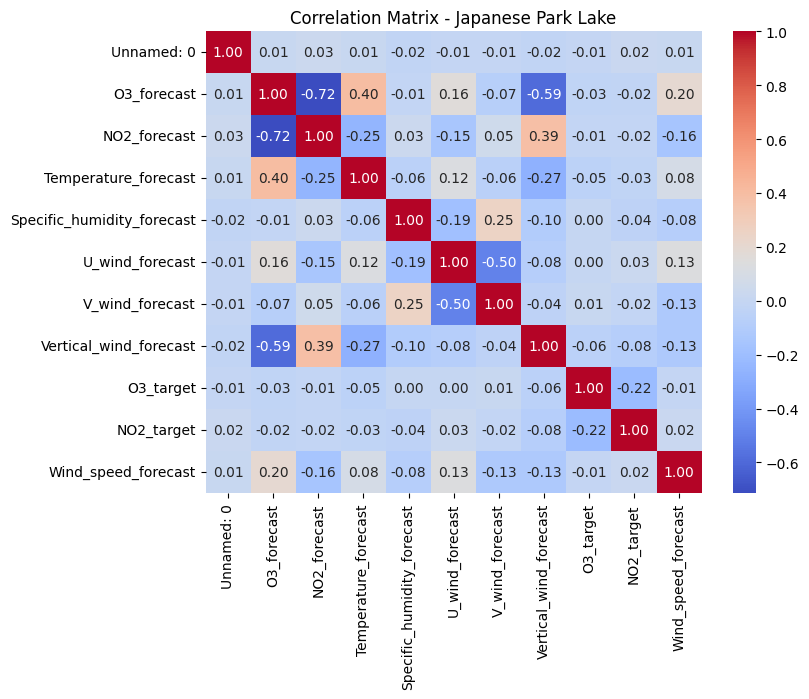

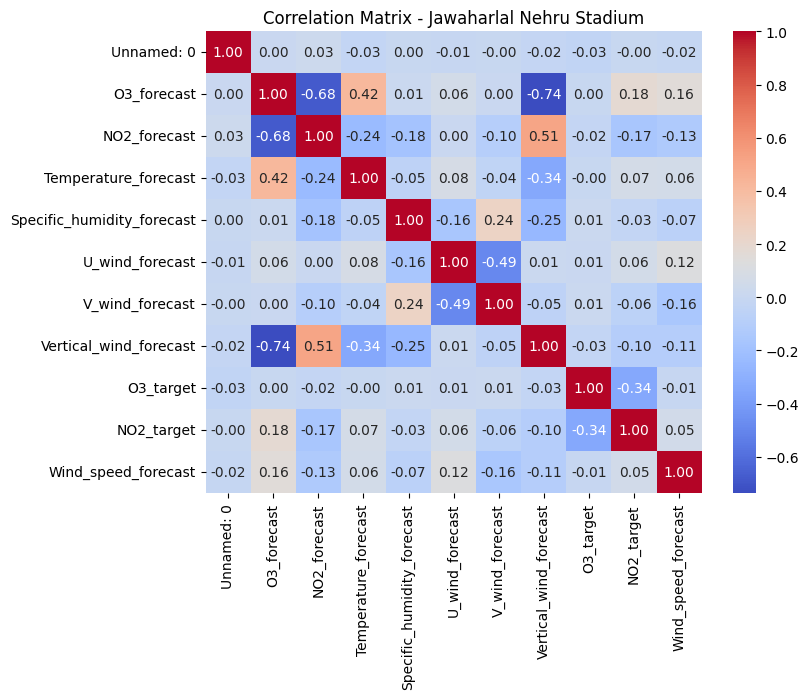

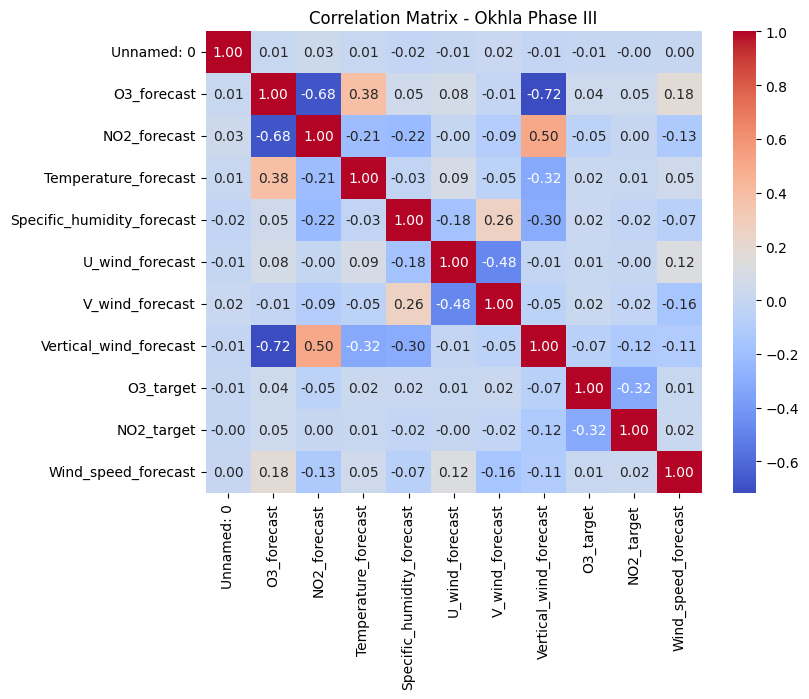

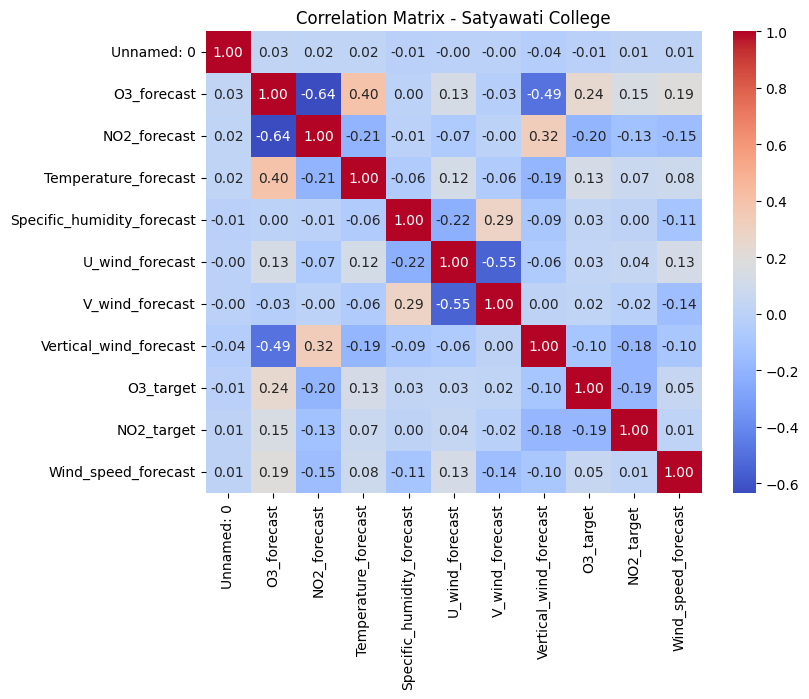

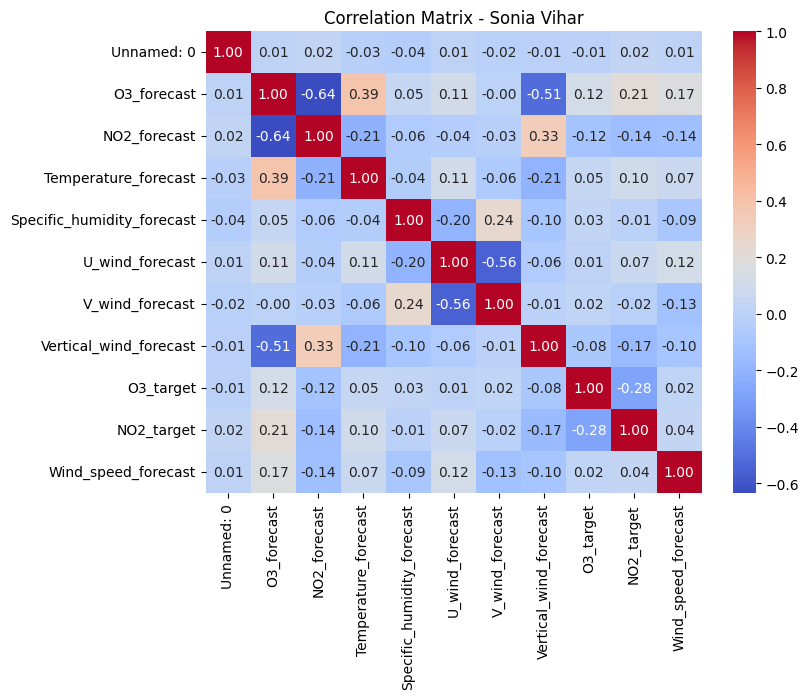

In [17]:
locations = df.index.get_level_values("location").unique()
for loc in locations:
    loc_df = df.xs(loc, level="location")
    
    corr_matrix = loc_df[numeric_cols].corr()
    
    plt.figure(figsize=(8,6))
    sns.heatmap(corr_matrix,
                annot=True,
                cmap="coolwarm",
                fmt=".2f")
    
    plt.title(f"Correlation Matrix - {loc}")
    plt.show()

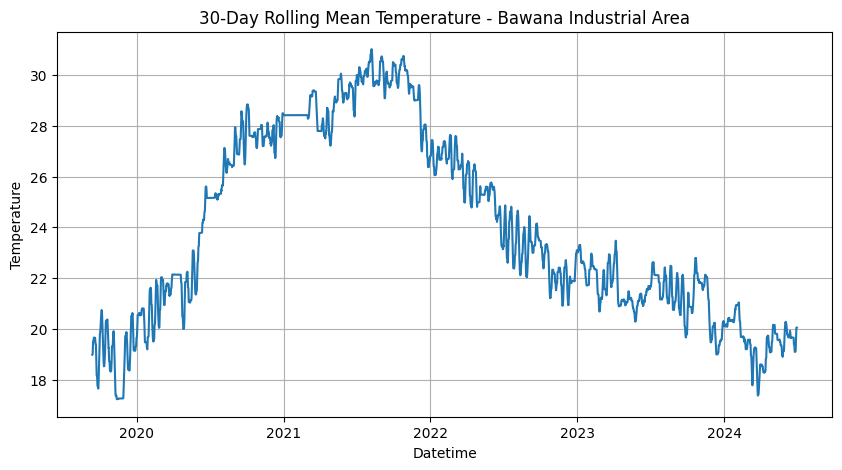

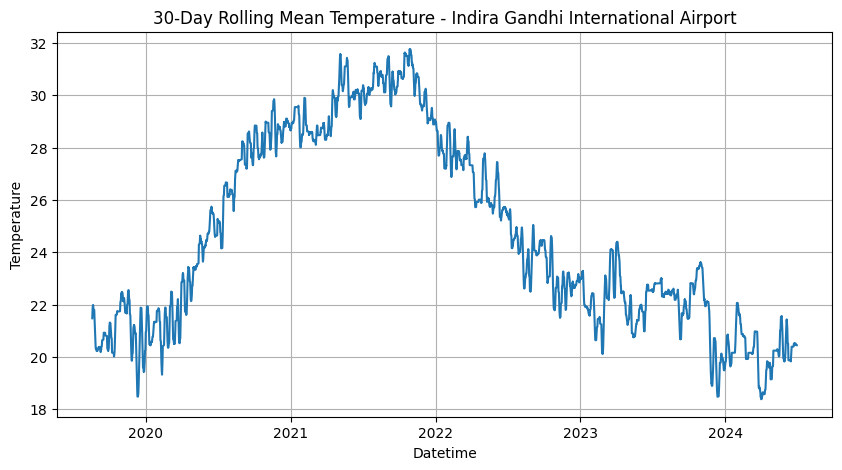

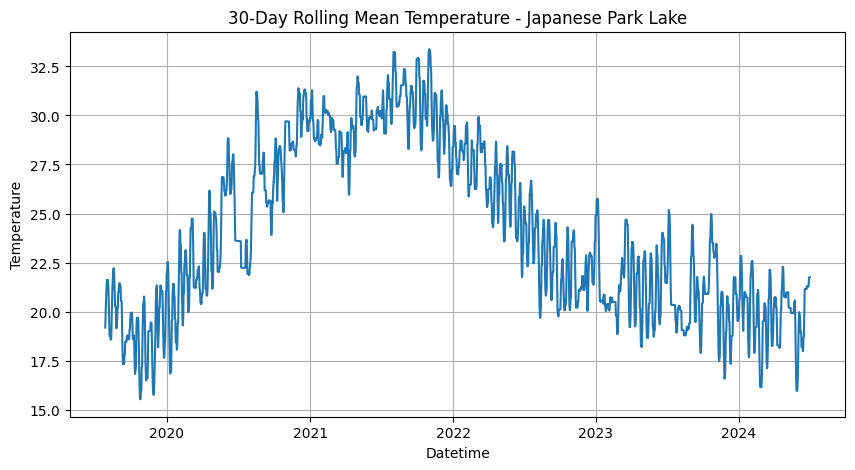

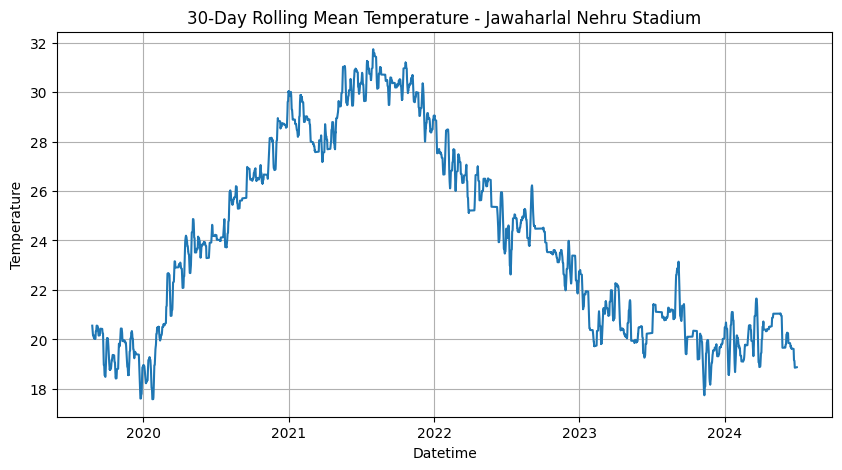

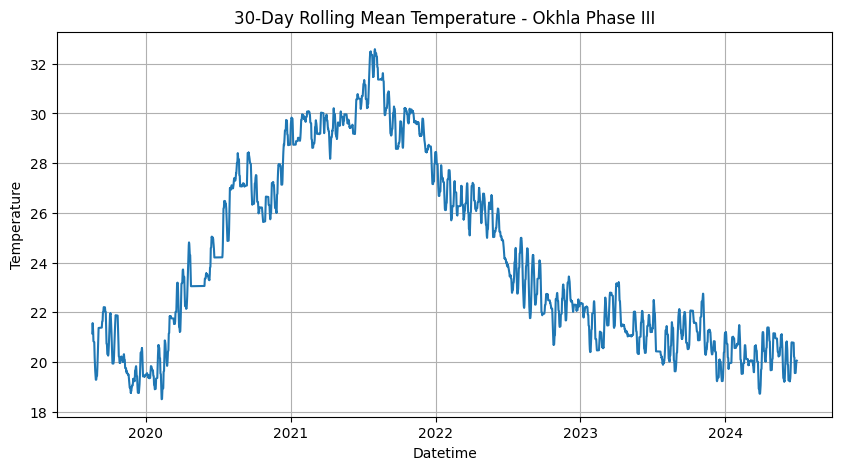

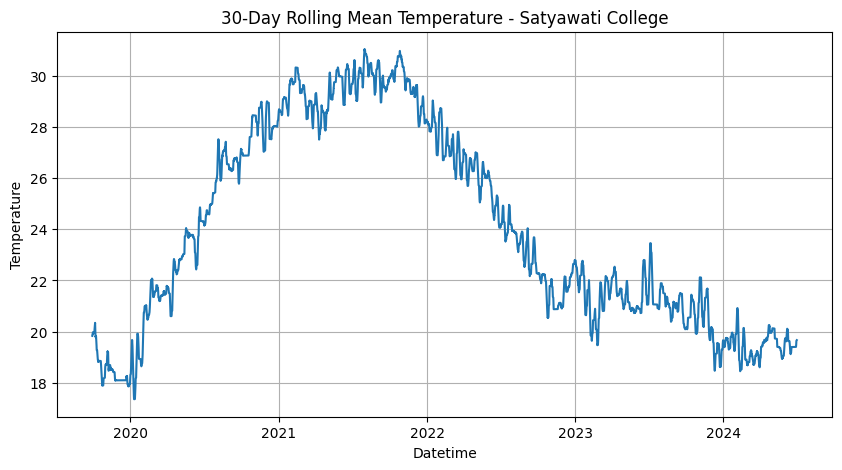

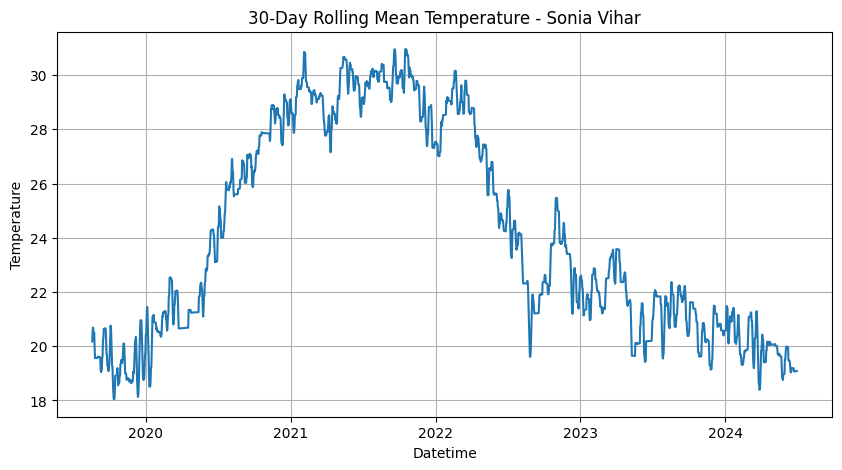

In [18]:
df["rolling_temp_30d"] = (df.groupby(level="location")["Temperature_forecast"].rolling(24*30).mean().reset_index(level=0, drop=True))
locations = df.index.get_level_values("location").unique()

for loc in locations:
    
    loc_df = df.xs(loc, level="location")
    
    plt.figure(figsize=(10,5))
    plt.plot(loc_df.index, loc_df["rolling_temp_30d"])
    
    plt.title(f"30-Day Rolling Mean Temperature - {loc}")
    plt.xlabel("Datetime")
    plt.ylabel("Temperature")
    plt.grid(True)
    plt.show()